Importing important libraries
The libraries include:
pandas - data manipulation and wrangling
nltk - natural language processessing
sklearn - feature extraction
bs4 - html handling
re, string, itertools - Data manipulation
langid - Language detection.

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer
from nltk import word_tokenize,WordNetLemmatizer,TweetTokenizer,PorterStemmer
from nltk.corpus import stopwords
from nltk.tag import pos_tag
import nltk
from bs4 import BeautifulSoup as bs
import re
import string
from itertools import groupby
import langid
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data] Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data] Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data] /root/nltk_data...
[nltk_data] Package averaged_perceptron_tagger is already up-to-
[nltk_data] date!
 Out[ 4 ]: True

In [3]:
df =spark.sql("Select int(Sentiment) as label, tweet from training_twitter_shuff")
df.count()

Out[ 8 ]: 1600000

converting spark dataframe to pandas df for easy initial data exploration

In [5]:
pd_df=df.toPandas()
pd_df.head()

Out[ 23 ]: 
 label tweet
0 4 It might be a good day to do the lotto. the we...
1 0 Guys, that breaks my heart to hear you say that 
2 4 @JEWNNBUGG hey doll! How ya feeling? 
3 4 @redvers I've been quite lucky this weekend......
4 0 @longhorn_chyck

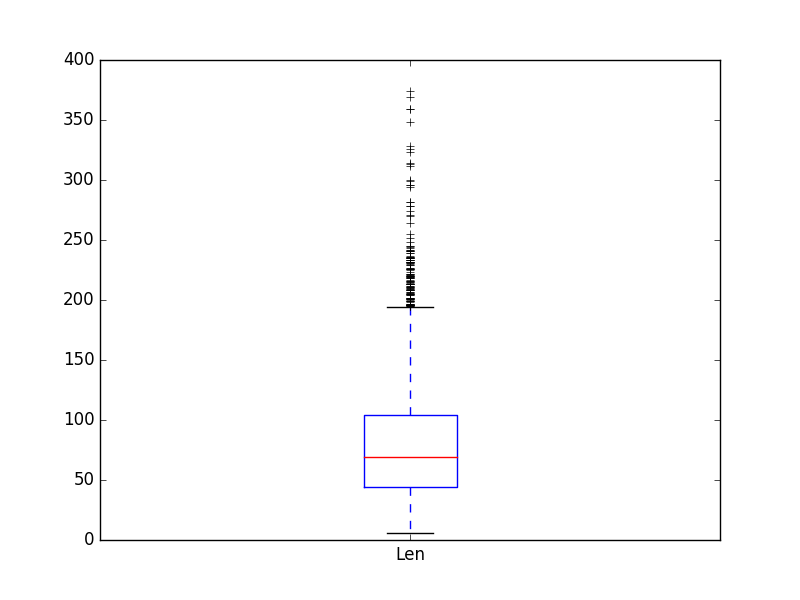

In [6]:
pd_df['Len']=[len(i) for i in pd_df['tweet']]
pd_df.Len.plot(kind='box', by ='label')
display()

Tweeter character limit was 140 during the time of data collection, therefore a character length more than 140 indicate issues in data

In [8]:
sample=pd_df[pd_df['Len']>140].sort_values('Len', ascending=False).tweet
sample

Out[ 25 ]: 
1574347 @catfish_ohm à¹à¸à¹à¸²à¹à¸«à¹à¸?à¸²à¸£à¹...
215448 @iannnnn à¹à¸à¸µà¹à¸¢à¸§à¸­à¸µà¸?à¸à¸±à¸?à...
376665 @neospace à¹à¸£à¸·à¹à¸­à¸à¸à¸±à¹à¸à¸à¸£...
1216309 5 days till new top gear î?î?î?î?î?î?î?...
800887 human shield à®à®©à¯?à®± à®à¯à®±à¯?à®¤à¯à®...
1492048 @KaewGB à¸­à¹à¸­ à¹à¸à¸¢à¸à¸²à¸¡à¹à¹à¸...
1150817 @thanr à¹à¸à¸µà¹à¸¢à¸§à¹à¸­à¸²à¸£à¸²à¸à¸²...
1142531 @msathia à®®à¯?à®¹à¯à®®à¯?, à®ªà®¯à®®à¯?à®±à¯...
1292939 @laches [æçèª å¯¦å
­ååæ¶] æè¿è·ä...
344087 ê·¼ë?° ë¡ë°¥ì?´ìì¼ë ì±
ìì§ê³  ë ë¤...
919791 @doax ì´ì°¨í¼ bandwidthë ë¶ì° íì?¼ ì...
1173347 @iReed ëë¶ë¶ì? ì°¬ì¬ë 'í°ì¹ì¤í¤'ì...
207777 à¸à¸­à¸¥à¸±à¸¡à¸à¸´à¸ªà¸à¹à¸à¸£à¸ AE à¸...
1544311 â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥OMGGG! 9 DAYS...
1582527 @justinchronicle íë¦° ë§?ìì? ìëì­ë...
496913 @chathuras à¶¶à¶½à·?à¶à·à¶± à·à¶»à· à¶ºà¶±...
237276 à¤à¤¾à¤¨ à¤à¤¤à¤¾ à¥¨ à¤¦à¤¿à¤µà¤¸ à¤¸à¥?à¤...
647771 @devilworks ì ì?ê²ë? ê·¸ë° ë¶ì?´ ê³ì­ë...
254145 rt @YashimaExteen: à¸à¹à¸² MS à¸à¸­à¸ à¹à...
941051 @ahohey project design à¹à¸à¹à¸?à¸à¸µà¹à...
1433573 #self_info 2ë¬ë? ê°ë°ì?... ì?¸ê°ì ?ì?¸ ê...
212386 å¨ä¿¡ç¨å?¡ç&quot;ç©ç?&quot;å??å©ä¸, æ ...
1022096 @thanr à¸®à¸²à¹ ... à¹à¸¡à¸·à¹à¸­à¸?à¸µà¹à...
257262 @ReadLead Utube, ëì¨ì?¸ì¬ì?´ë, í¸ìì?...
1036787 @hongss ì¼ì± ì?´ë³ì²  íì¥ì?´ ì´ìì? ë...
1512135 @KnightBaron à¸«à¸¥à¸±à¸à¸à¸´à¸à¸à¸±à¹à¸...
751627 @mrapoport Ð?Ðµ Ð¼Ð¾Ð³Ñ Ñ?ÐºÐ°Ð·Ð°ÑÑ Ð¾ ÑÐ...
525437 @thanate à¸?à¹à¹à¸¡à¹à¸£à¸¹à¹à¹à¸«à¸¡à¸·à...
820358 Firefly Ñ?ÑÐ¾ ÐºÐ°ÐºÐ°Ñ?-ÑÐ¾ Ñ?Ð¾Ð²ÐµÑÑÐµÐ...
1334343 &quot;Ð¯ Ð¿Ð¾Ð´Ð¿Ð¸Ñ?Ð°Ð»Ñ?Ñ? Ð½Ð° Ð²Ð°ÑÑ RS...
 ... 
1269743 Have to go for an imp. meeting! Very sad about...
1270030 From Tony &amp; Sage, drink 1/2 your body weig...
601935 oh, checked my email &amp;i just won a ticket ...
1270171 Been a while..Leavin a tweet....movin soon...s...
601812 My mouth just watered!!! Looks DELICIOUS! Save...
1270902 @bjblyth tell me about it @thomasmike had his ...
1270955 @chillumdog You're kidding? I worked with a Sp...
599355 @TraceCyrus it's kinda unfair that you guys ar...
599250 Great news for all boaters in Dubai. The Dubai...
1271406 @iA there 2nd-place result for typography is ...
599074 Another dismal story about economy &amp; vapor...
599020 I'm out of nyquil. I need sleep so hopefully ...
598964 Video: I find this really scary actually. haha...
598167 @seeseanpop McDonalds used to have a pasta mea...
593484 O-m-cheeze Louise! I am so going to be workin...
597509 @lissyx hooooray &lt;3 i like hugs! especially...
596621 Was enjoyn d most delicious slumber &amp; then...
596545 No posts 4 2 days. Sat was church picnic. Wen...
596458 Photo: Credit to Cathy for the picture Â SO. ...
1272819 @spiderogumi_ because he's so quiet i want on...
596020 @kerlikoiv hi i recently discovered your musi...
595762 The Elation &amp; Cardboard Cutout are playing...
1272925 Storm chase &amp; streaming ops are a no-go to...
1273263 Sniffle. I wish Eba was here to sing Wicked so...
1273346 @UseTrojan aww man i heard! you guys suck for ...
595501 LOVE working out first thing in the morning &...
1273497 Ay yiyi, poor lost dog. She's so sweet.. dirty...
595097 Kinda regretting my decision 2 stay up ALL nig...
593751 @Craig_Schutz YES!!!!!!!!!!!!!!!!!!!!!!! IM m...
1599917 G'nite friend! rb@threebears: &quot;dawn broke...
Name: tweet, dtype: object

Python functions are created to clean the tweets to final modeling data.

htmlcleaning - converts html formatted tweets to actual tweets. ||
tag_and_remove - keeps only nouns, adjectives, verbs and adverbs only in the tweets. ||
lemmatize - converts words to its lemmatized form. ||
check_lang - predict the language of the given text.

In [10]:
def htmlcleaning(data_str):
  return bs(data_str,"lxml").get_text()


def tag_and_remove(data_str):
    nltk.download('averaged_perceptron_tagger')
    cleaned_str = ' '
    # noun tags
    nn_tags = ['NN', 'NNP', 'NNP', 'NNPS', 'NNS']
    # adjectives
    jj_tags = ['JJ', 'JJR', 'JJS']
    # verbs
    vb_tags = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
    # adverbs
    avb_tags =['RB','RBR','RBS']
    
    nltk_tags = nn_tags + jj_tags + vb_tags + avb_tags
    # break string into 'words'
    text = data_str.split()
    # tag the text and keep only those with the right tags
    tagged_text = pos_tag(text)
    #print(tagged_text)
    for tagged_word in tagged_text:
        if tagged_word[1] in nltk_tags:
            cleaned_str += tagged_word[0] + ' '
    return cleaned_str
  
  
def lemmatize(data_str):
    nltk.download('wordnet')
    # expects a string
    list_pos = 0
    cleaned_str = ''
    lmtzr = WordNetLemmatizer()
    text = data_str.split()
    tagged_words = pos_tag(text)
    for word in tagged_words:
        if 'v' in word[1].lower():
            lemma = lmtzr.lemmatize(word[0], pos='v')
        else:
            lemma = lmtzr.lemmatize(word[0], pos='n')
        if list_pos == 0:
            cleaned_str = lemma
        else:
            cleaned_str = cleaned_str + ' ' + lemma
        list_pos += 1
    return cleaned_str
  
  
def check_lang(data_str):
    predict_lang = langid.classify(data_str)
    if predict_lang[1] >= .9:
        language = predict_lang[0]
    else:
        language = 'NA'
    return language

cleaning_irrelevant - cleaning irrelevant words from the tweets 
1. handing tweeting word (words with repeated characters usually used in tweets)
2. handling apostrophes words
3. removing urls and hyperlinks
4. handling punctuations
5. handling numbers and alphanumeric words
6. remove @callouts and #mentions

In [12]:
def cleaning_irrelevant(data_str):
  #handling tweeting word
  commonBigrams=['l','s','e','o','t','f','p','r','m','c','n','d','g','i','b']
  data_str=''.join(''.join(i)[:2] if value in commonBigrams else ''.join(i)[:1] for value,i in groupby(data_str))
  #handling aphostrophe words
  apostrophes={"i'm":"i am","aren't":"are not","can't":"cannot","couldn't":"could not","didn't":"did not","doesn't":"does not","don't":"do not","hadn't":"had not","hasn't":"has not","haven't":"have not","he'd":"he had","he'll":"he will","he's":"he is","I'd":"I had","I'll":"I will","I'm":"I am","I've":"I have","isn't":"is not","it's":"it is","let's":"let us","mustn't":"must not","shan't":"shall not","she'd":"she had","she'll":"she will","she's":"she is","shouldn't":"should not","that's":"that is","there's":"there is","they'd":"they had","they'll":"they will","they're":"they are","they've":"they have","we'd":"we had","we're":"we are","we've":"we have","weren't":"were not","what'll":"what will","what're":"what are","what's":"what is","what've":"what have","where's":"where is","who'd":"who had","who'll":"who will","who're":"who are","who's":"who is","who've":"who have","won't":"will not","wouldn't":"would not","you'd":"you had","you'll":"you will","you're":"you are","you've":"you have","y'll":"you all"}
  data_str=' '.join(apostrophes[word.lower()] if word.lower() in apostrophes else word for word in data_str.split())
  #handling urls
  url_re = re.compile('https?://(www.)?\w+\.\w+(/\w+)*/?')
  #handling callouts & Hashtags
  mention_re = re.compile('[@#](\w+)')
  #handling punctuations
  punc_re = re.compile('[%s]' %re.escape(string.punctuation))
  #handling numbers
  num_re = re.compile('(\\d+)')
  #handling valid words
  alpha_num_re = re.compile("^[a-z0-9_.]+$")
  #stop words
  #stop_words=set(stopwords.words('english'))
  # convert to lowercase
  data_str = data_str.lower()
  # remove hyperlinks
  data_str = url_re.sub(' ', data_str)
  # remove @mentions
  data_str = mention_re.sub(' ', data_str)
  # remove puncuation
  data_str = punc_re.sub(' ', data_str)
  # remove numeric 'words'
  data_str = num_re.sub(' ', data_str)
  data_str=' '.join(word for word in data_str.split() if alpha_num_re.match(word)) #and not word in stop_words)
  return data_str

In [13]:
for tweet in mini:
  print(lemmatize(tag_and_remove(cleaning_irrelevant(htmlcleaning(tweet)))))

converting python functions to pyspark udfs using udf and stringtype functions

In [15]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

In [16]:
remove_features_udf = udf(cleaning_irrelevant, StringType())
tag_and_remove_udf = udf(tag_and_remove, StringType())
lemmatize_udf = udf(lemmatize, StringType())
htmlcleaning_udf = udf(htmlcleaning, StringType())
check_lang_udf=udf(check_lang,StringType())

In [17]:
from pyspark.sql.functions import length
clean_df=df.withColumn("clean",lemmatize_udf(tag_and_remove_udf(remove_features_udf(htmlcleaning_udf((df['tweet']))))))
clean_df_2 = clean_df.select('label','clean').filter(length(clean_df.clean)>0)
clean_df_2.count()

Out[ 9 ]: 1594604

In [18]:
# Split the data into training and test sets (40% held out for testing)
(trainingData, testData) = clean_df_2.randomSplit([0.6, 0.4])

Creating pipeline using tokenizer | ngram | combiner | TF-IDF | LogisticRegression

In [20]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer,NGram,VectorAssembler,SQLTransformer
from pyspark.ml import Pipeline
from pyspark.ml.classification import NaiveBayes, RandomForestClassifier,LogisticRegression
from pyspark.sql.functions import col, concat 
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator,MulticlassClassificationEvaluator

# Configure an ML pipeline, which consists of tree stages: tokenizer, hashingTF, and nb.
tokenizer = Tokenizer(inputCol="clean", outputCol="word")

ngram = NGram(n=2, inputCol="word", outputCol="ngrams")

sql = SQLTransformer(statement="SELECT *, concat(word,ngrams) AS word_comb FROM __THIS__")

hashingTF = HashingTF(inputCol="word_comb", outputCol="rawFeatures")

idf = IDF(minDocFreq=3, inputCol="rawFeatures", outputCol="features")

# Logistic regression model
logistic = LogisticRegression(maxIter=10,regParam=0.001,elasticNetParam=1)

# Pipeline Architecture

pipeline=Pipeline(stages=[
    tokenizer, 
    ngram,
    sql,
    hashingTF,
    idf,
    logistic
])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

Tuning logistic model using grid search method. Paramter grid is created with various values of regularisation threshold and Regularizition methods (Lasso, Ridge, Elastic Net)

In [22]:
paramGrid = ParamGridBuilder().addGrid(logistic.regParam, [0.0001,0.001,0.01,0.1,1,10]).addGrid(logistic.elasticNetParam,[0,0.1,0.9,1]).build()
cv = CrossValidator(estimator=pipeline, evaluator=BinaryClassificationEvaluator(), estimatorParamMaps=paramGrid)

cvModel = cv.fit(trainingData)

In [23]:
model = cvModel.bestModel

In [24]:
predictions = model.transform(testData)
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(rawPredictionCol="prediction")
evaluator.evaluate(predictions)

Out[ 37 ]: 0.7896458401059105

In [25]:
extract= predictions.select("label","prediction").toPandas()
extract.head()

In [26]:
predictions = model.transform(testData)
#predictions.show()
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
evaluator.evaluate(predictions)

In [27]:
mylist=["Heading to the not Great State of Minnesota!"]
test=spark.createDataFrame(mylist, StringType())
test=test.selectExpr("value as tweet")

test_df=test.withColumn("clean",lemmatize_udf(tag_and_remove_udf(remove_features_udf(htmlcleaning_udf(test['tweet'])))))

#pred_test.show()

In [28]:
pred_test = model.transform(test_df)
selected = pred_test.select("tweet","clean", "probability", "prediction")
for row in selected.collect():
    tweet, clean, prob, prediction = row
    if prediction == 4:
      pred = "Positive"
    else:
      pred = "Negative"
    print("%s -->%s-->prediction=%s\n" % (tweet,clean,pred))

Heading to the not Great State of Minnesota! -->head not great state minnesota-->prediction=Negative

Exporting and importing model using mleap library

In [30]:
model.save("/FileStore/spark-logistic-regression-model")

In [31]:
from pyspark.ml import PipelineModel
sameModel = PipelineModel.load("/FileStore/spark-logistic-regression-model")
mylist=["Heading to the not Great State of Minnesota!"]
test=spark.createDataFrame(mylist, StringType())
test=test.selectExpr("value as tweet")

test_df=test.withColumn("clean",lemmatize_udf(tag_and_remove_udf(remove_features_udf(htmlcleaning_udf(test['tweet'])))))
pred_test = sameModel.transform(test_df)
selected = pred_test.select("tweet","clean", "probability", "prediction")
for row in selected.collect():
    tweet, clean, prob, prediction = row
    if prediction == 4:
      pred = "Positive"
    else:
      pred = "Negative"
    print("%s -->%s-->prediction=%s\n" % (tweet,clean,pred))

Heading to the not Great State of Minnesota! -->head not great state minnesota-->prediction=Negative